In [2]:
from lifelines.utils import datetimes_to_durations

In [3]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame
print (df.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [4]:
T = df['T']
E = df['E']

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) 

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

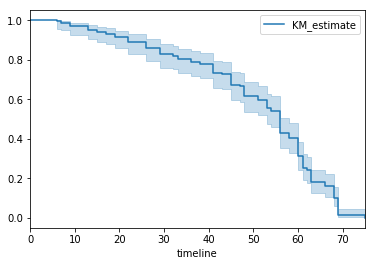

In [9]:
%matplotlib inline

kmf.survival_function_
kmf.median_
kmf.plot()

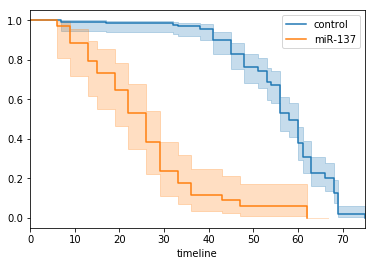

In [10]:
groups = df['group']
ix = (groups == 'miR-137')
kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()
kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [11]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

In [16]:
from lifelines.utils import survival_table_from_events
table = survival_table_from_events(T, E)
print (table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157


In [17]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()
regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2214     1.2478    0.0743 2.9808 0.0029      0.0758      0.3669  **
var2 0.0508     1.0521    0.0829 0.6129 0.5400     -0.1117      0.2133    
var3 0.2187     1.2444    0.0758 2.8851 0.0039      0.0701      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


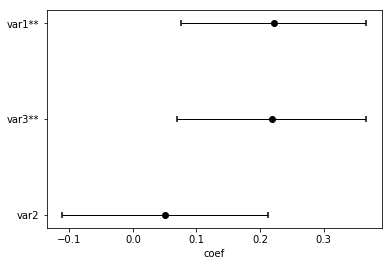

In [24]:
from lifelines import AalenAdditiveFitter, CoxPHFitter

cf = CoxPHFitter()
cf.fit(regression_dataset, 'T', event_col='E')
cf.print_summary()
cf.plot()

In [23]:
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

 [-----------------100%-----------------] 189 of 189 complete in 1.3 sec


<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

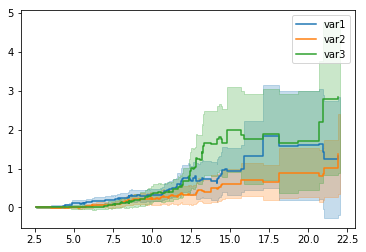

In [25]:
aaf.plot()

In [32]:
from lifelines import AalenAdditiveFitter
data.head()

import patsy
# the '-1' term
# refers to not adding an intercept column (a column of all 1s).
# It can be added to the Fitter class.
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')
X.columns

Index(['un_continent_name[Africa]', 'un_continent_name[Americas]',
       'un_continent_name[Asia]', 'un_continent_name[Europe]',
       'un_continent_name[Oceania]', 'regime[T.Military Dict]',
       'regime[T.Mixed Dem]', 'regime[T.Monarchy]',
       'regime[T.Parliamentary Dem]', 'regime[T.Presidential Dem]',
       'start_year'],
      dtype='object')

In [33]:
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)

In [34]:
data = lifelines.datasets.load_dd()
X['T'] = data['duration']
X['E'] = data['observed']

In [35]:
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 9.3 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

In [40]:
import matplotlib.pyplot as plt

plt.figsize = (12.5,8)
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


In [42]:
aaf.plot( columns=[ 'regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]' ], ix=slic3))

SyntaxError: invalid syntax (<ipython-input-42-dc420a5edbd5>, line 1)

In [44]:
##Cox’s Proportional Hazard model

from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
rossi_dataset = load_rossi()
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [45]:
cf = CoxPHFitter()

In [46]:
cf.fit(rossi_dataset, 'week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

In [50]:
cf.hazards_ 
cf.print_summary()

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1821      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640


In [55]:
cf.predict_hazards_

AttributeError: 'CoxPHFitter' object has no attribute 'predict_hazards_'

NameError: name 'survivalZeros' is not defined

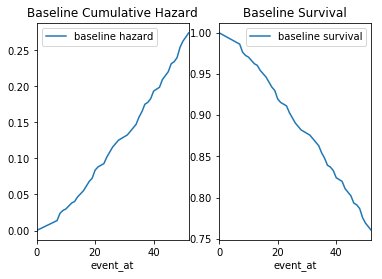

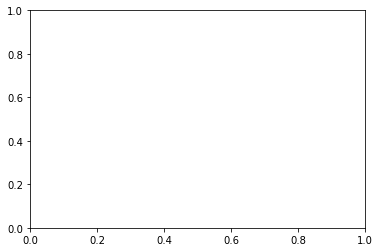

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

cf = lifelines.CoxPHFitter()
cf.fit(load_rossi(), 'week', event_col = 'arrest')

#Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
cf.baseline_cumulative_hazard_.plot(ax = axes[0], title = "Baseline Cumulative Hazard")
cf.baseline_survival_.plot(ax = axes[1], title = "Baseline Survival")

#Pedict a value
import numpy as np
coefficients = np.array([[0,0,0,0,0,0,0]])
cf.predict_survival_function(coefficients)

fig, axis = plt.subplots(nrows=1, ncols=1, sharex=True)
survivalZeros.plot(ax = axis, title = "Baseline Cumulative Hazard for coefficients")

#Get the log likihood
loglik = cf._log_likelihood